### Import libraries

In [39]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft,  ifft, fftfreq, fftshift, dct, idct

### Extract data

In [17]:
inFile = '../data/input/BetaMeas_Lab2.root'
treeName = 'wfm'
branchNameAmplitude = 'w3'
branchNameTime = 't3'
dt = 0.1 # ns

In [18]:
inData = uproot.open(inFile)[treeName]
Amplitude_arr = inData[f'{branchNameAmplitude}'].array(library="np")
Time_arr = inData[f'{branchNameTime}'].array(library="np")

In [19]:
Amplitude_arr

array([array([ 0.00159053,  0.00140928, -0.0010129 , ..., -0.00285837,
              -0.00206746, -0.00286661])                              ,
       array([ 0.00338658,  0.00421869,  0.00327947, ..., -0.00108705,
               0.00047831,  0.00105502])                              ,
       array([-0.00058449, -0.00016431,  0.00241441, ...,  0.00217548,
              -0.00134245, -0.00026318])                              ,
       ...,
       array([ 0.00081609,  0.00196128, -0.00077398, ..., -0.00016431,
               0.0011786 ,  0.00104678])                              ,
       array([-0.00011488,  0.00082433, -0.00010664, ..., -0.00675529,
              -0.00451436, -0.0013754 ])                              ,
       array([-1.05409481e-03, -1.57313415e-03, -1.97267975e-04, ...,
              -4.77384441e-04, -2.68536129e-03,  6.63710525e-05])    ],
      dtype=object)

### Draw first three events

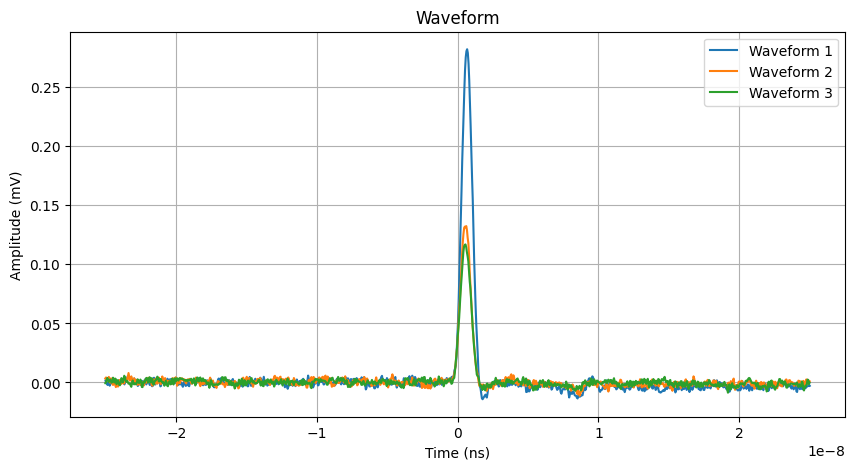

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Time_arr[0], Amplitude_arr[0], label='Waveform 1')
ax.plot(Time_arr[1], Amplitude_arr[1], label='Waveform 2')
ax.plot(Time_arr[2], Amplitude_arr[2], label='Waveform 3')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Waveform')
ax.grid(True)
ax.legend()
plt.show()


### FFT of first signal

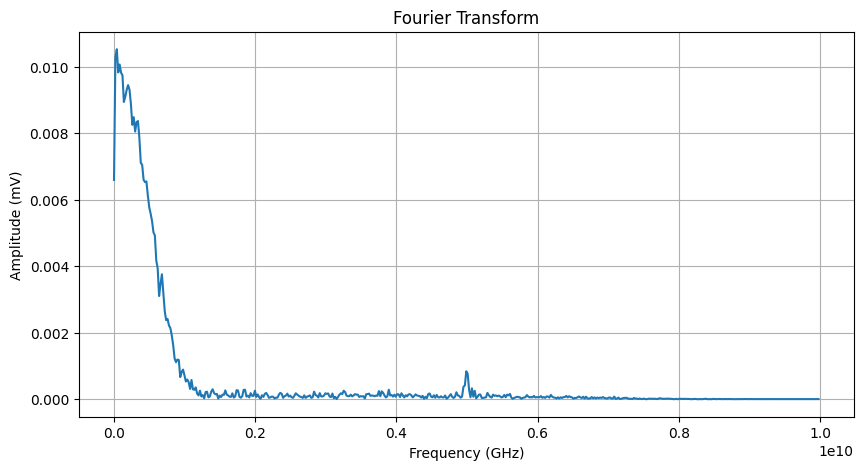

In [73]:
fft_amplitude = fft(Amplitude_arr[0])
xf = fftfreq(len(Amplitude_arr[0]), Time_arr[0][1] - Time_arr[0][0])
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(xf[:len(Amplitude_arr[0])//2], 2.0/len(Amplitude_arr[0]) * np.abs(fft_amplitude[0:len(Amplitude_arr[0])//2]))
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Fourier Transform')
ax.grid(True)
plt.show()

### Remove noisy frequencies

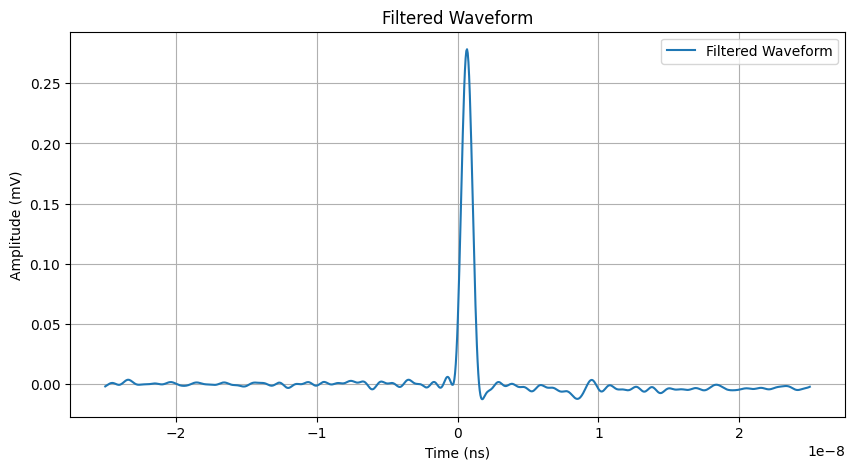

In [100]:
freq_threshold = 1e9
fft_amplitude_filtered = np.copy(fft_amplitude)
fft_amplitude_filtered[np.abs(xf) > freq_threshold] = 0
filtered_signal = np.real(ifft(fft_amplitude_filtered))
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Time_arr[0], filtered_signal, label='Filtered Waveform')
#ax.plot(Time_arr[0], Amplitude_arr[0], label='Original Waveform')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Filtered Waveform')
ax.grid(True)
ax.legend()
plt.show()
